In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [57]:
df_train = pd.read_csv(r"C:\Users\vtk_ru1\OneDrive - Servier Monde\Рабочий стол\Project ML\transneft_test\test_work_transneft\data.csv")

In [58]:
sampl = np.arange(12.591554, 15.030000, 0.025183)
df_test = pd.DataFrame(sampl, columns=['x'])
df_test.insert(1, "y", 5.568287)

In [59]:
df_test

,x,y
0,12.591554,5.568287
1,12.616737,5.568287
2,12.641920,5.568287
3,12.667103,5.568287
4,12.692286,5.568287
...,...,...
92,14.908390,5.568287
93,14.933573,5.568287
94,14.958756,5.568287
95,14.983939,5.568287


In [60]:
df = pd.concat([df_train, df_test])

In [61]:
df

,x,y
0,0.000000,-15.000000
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
...,...,...
92,14.908390,5.568287
93,14.933573,5.568287
94,14.958756,5.568287
95,14.983939,5.568287


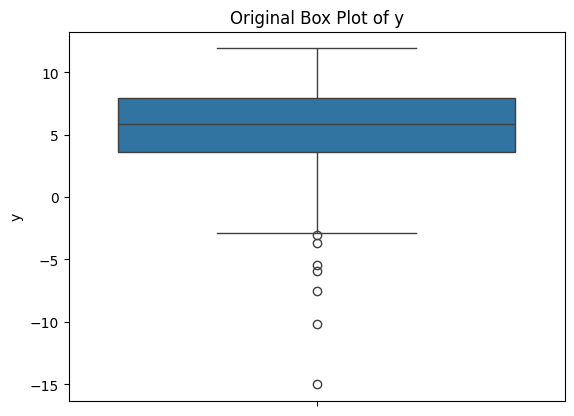

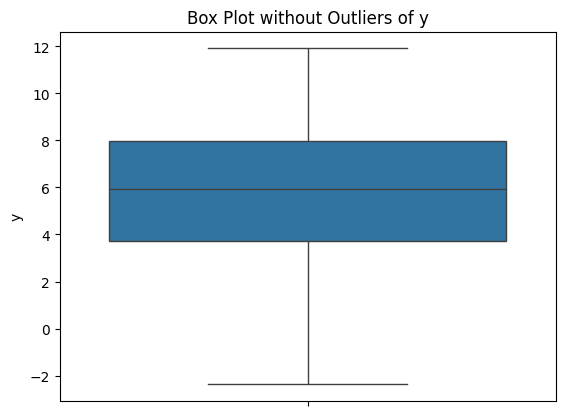

In [62]:
def removal_box_plot(df_train, y, threshold):
    sns.boxplot(df_train[y])
    plt.title('Original Box Plot of y')
    plt.show()
 
    removed_outliers = df_train[df_train[y] >= threshold]
 
    sns.boxplot(removed_outliers[y])
    plt.title('Box Plot without Outliers of y')
    plt.show()
    return removed_outliers
 
 
threshold_value = -2.5
 
df_train = removal_box_plot(df_train, 'y', threshold_value)

In [72]:
rng = np.random.RandomState(None)
X = np.array(df.x).reshape(-1, 1)
y = np.array(df.y).reshape(-1, )
X_train = np.array(df_train.x).reshape(-1, 1)
y_train = np.array(df_train.y).reshape(-1, )
X_test = np.array(df_test.x).reshape(-1, 1)
y_test = np.array(df_test.y).reshape(-1, )

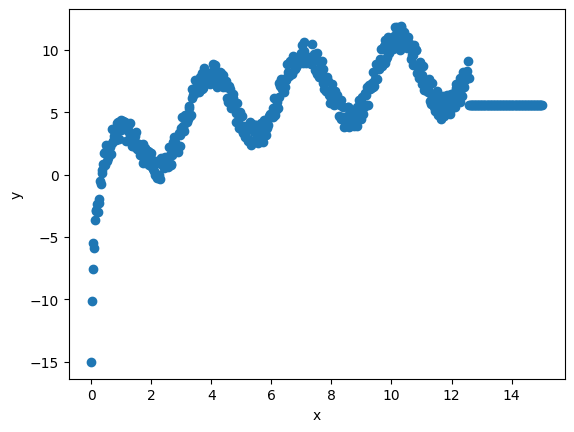

In [73]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

In [74]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [77]:
y_2

array([8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032302,
       8.45032302, 8.45032302, 8.45032302, 8.45032302, 8.45032

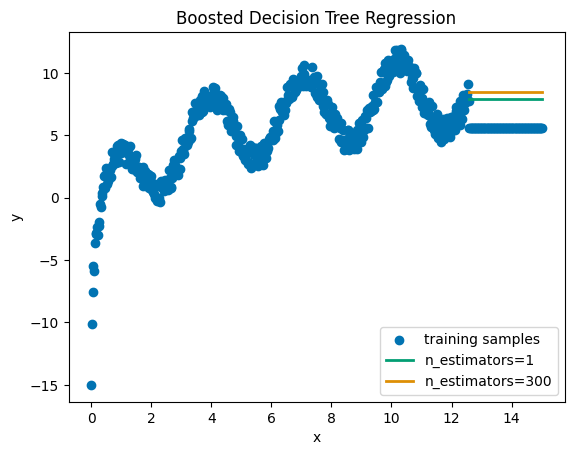

In [81]:
colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X_test, y_1, color=colors[2], label="n_estimators=1", linewidth=2)
plt.plot(X_test, y_2, color=colors[1], label="n_estimators=300", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()